<a href="https://colab.research.google.com/github/pradee1/kitchen_monitoring/blob/master/kitchen_monitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kithcen Monitoring: Transfer Learning
<br></br>
  <p>
  It is quiet easy for a human to look at a kitchen and determine weather or not the kitchen's clean. Specific details may be subjective, but in a general sense, it's a trivial task.
</p>
<p>
  In this experiment, I used deep learning techniques on a smaple dataset (103 images of a friend's kithchen). Using a ResNet34 model architecture and pre trained weights, the current model is accurate more 90% time in determining whether the kitchen is tidy. 
  </p>
  
  Note: 103 images is a small set for deep learning. But the fact the we're using weights trained on Imagenet data (transfer learning) means that the classifier only has to updates the weights of the final layers of the neural net making the 103 images sufficient in this case.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
import numpy as np
import re

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/data_dl"

kitchen


In [0]:
file_path = "/content/drive/My Drive/data_dl/kitchen.zip"

In [0]:
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'data_dl/'
path = Path(base_dir + 'kitchen')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/data_dl/kitchen/untidy'),
 PosixPath('/content/drive/My Drive/data_dl/kitchen/tidy'),
 PosixPath('/content/drive/My Drive/data_dl/kitchen/models')]

In [0]:
np.random.seed(0)
data = ImageDataBunch.from_folder(path,valid_pct=0.35, size=224, bs=32)

In [0]:
data.classes

['tidy', 'untidy']

# Snippets into training data

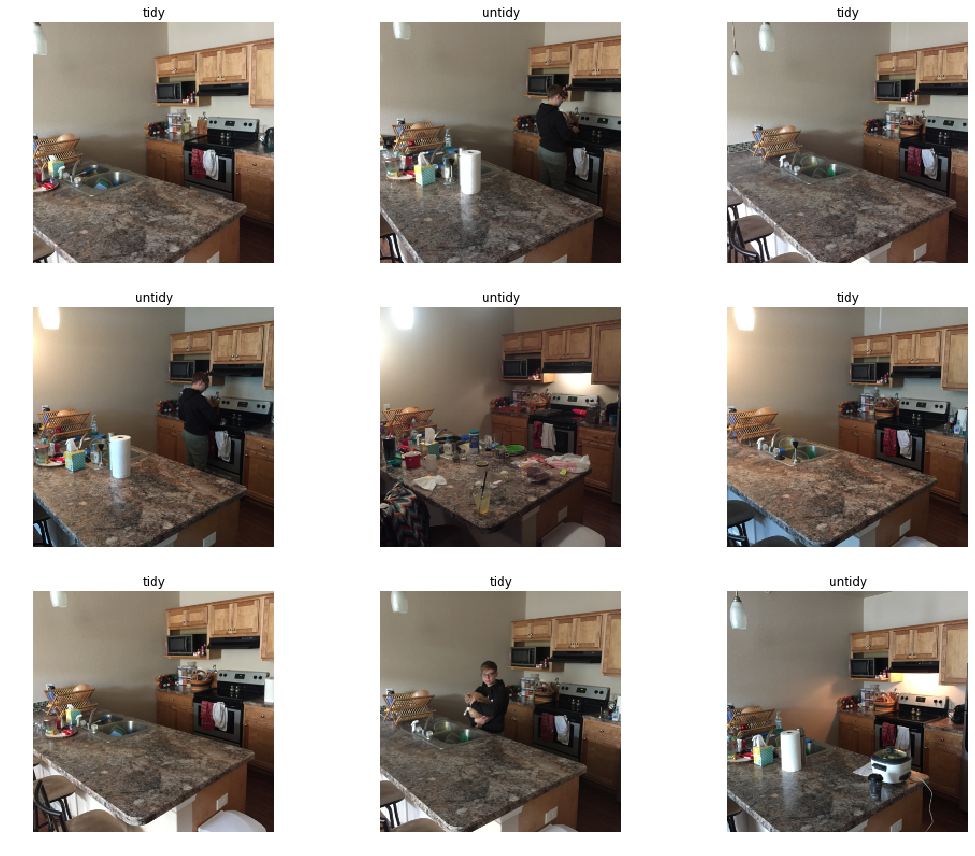

In [0]:
data.show_batch(rows=3, figsize=(15,12))

# Training

In [0]:
print(data.classes)
len(data.classes),data.c

['tidy', 'untidy']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

# Testing: accuracy - 97%

In [0]:
learn.metrics=[accuracy]
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.995175,0.347970,0.888889,00:23
1,0.550061,0.141190,0.972222,00:23
2,0.369768,0.100963,0.972222,00:24


In [0]:
learn.save('stage-final')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

# Predictions

Visual Explanation for classifier's predictions:
http://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf

The coolest thing - specific areas for tidy/untidy decision making were learned by the classifier. (The counter top is the main source of tidy/untidy kitchen - convention follwoed by human labeler)

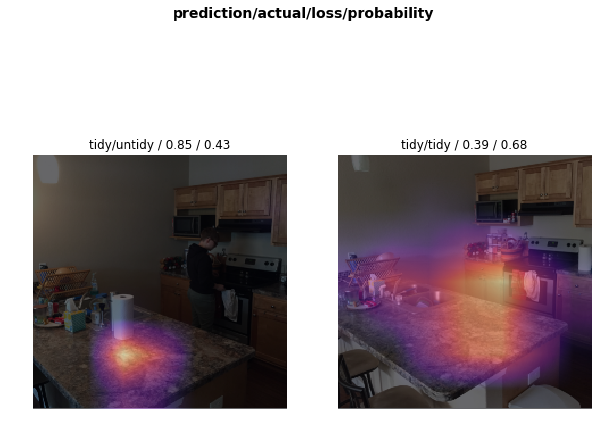

In [0]:
interp.plot_top_losses(2, figsize=(10,8))

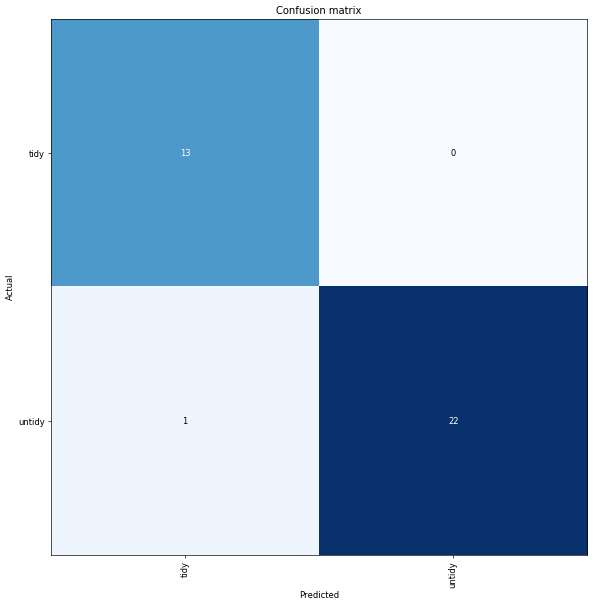

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)